### Hypothesis Testing

#### Part 1: Recap

1.State which test should be used for the following scenarios to calculate p-values. Explain your choice.

- You randomly select 50 dogs and 80 cats from a large animal shelter, and want to know if dogs and cats have the same weight.


- A random sample of San Franciscans and Oaklanders were surveyed about their favorite baseball team, and you want to determine if the same proportion of people like the SF Giants.

***if dogs and cats have the same weight?***

Differences of means --> t-test (normally)

A two sample t-test would be appropriate here _provided_ we can assume the weights of 
dogs (and cats) is normally distributed as this is an assumption of the t-test; On the other hand, with sample sizes above 30 the t-test will give nearly identical results to a z-test.(Central Limit Theorem)


- Ho: mdogs - mcats = 0  --> no difference
- Ha: mdogs - mcats != 0 --> difference


- significance level alpha a = 0.05

Z test for differences of means.


***if the same proportion of people like the SF Giants?***

Like or not? vote or not? etc. These sound familiar to Bernoulli random variable with binary results. In other words we may perceive sample sizes as binomial distributions.

Ho: psf - poak = 0 (same proportion)
Ha: psf - poak != 0 (different proportion)

Two tailed test, with zombined Z value to find p-values.

2.A study attempted to measure the influence of patients' astrological signs on their risk for heart failure. 12 groups of patients (1 group for each astrological sign) were reviewed and the incidence of heart failure in each group was recorded.

For each of the 12 groups, the researchers performed a z-test comparing the incidence of heart failure in one group to the incidence among the patients of all the other groups (i.e. 12 tests). The group with the highest rate of heart failure was Pisces, which had a p-value of .026 when assessing the null hypothesis that it had the same heart failure rate as the group with the lowest heart failure rate, Leo. What is the the problem with concluding from this p-value that Pisces have a higher rate of heart failure than Leos at a significance level of 0.05? How might you adjust your interpretation of this p-value?

- Highest heart failure rate sign: pisces
- Lowest heart failure rate sign: leo


- Ho: Hp - Hl <= 0
- Ha: Hp - Hl >0 
- 12 groups --> ?? 12 tests
- resulting p-value = 0.026
- significance level a = 0.05

The problem is performing multiple tests at the 0.05 significance level which does not work at all because such significance level should be distributed among all the comparisons.

Also do we have 12 comparisons because we have 12 groups? The answer is definetly no. Instead there are 12 choose 2 pairwise combinations on this senario.

To fix that we should gi with Bonferonni correction which also means that we should divide the initial significance level to the number of comparisons to compare each significance level to individual p-values of the comparisons.

With the following code we will find the alpha corresponding to each comparison.

In [1]:
# there are way easier ways to do this considering the computing power
# I am simply playing

from itertools import combinations

sign_numbers = [1,2,3,4,5,6,7,8,9,10,11,12]
comb = combinations(sign_numbers, 2)

number_of_comparisons = 0
for i in range(len(list(comb))):
    number_of_comparisons += 1

number_of_comparisons

66

In [2]:
initial_alpha = 0.05
alpha = initial_alpha / number_of_comparisons
alpha

0.0007575757575757576

Originally and mistakenly we would reject the null hypothesis that there heart failure rate of leo is same with that of pisces.

0.026 < 0.05

Because p-value 0.026 is lower than significance level 0.05 and we would perceive it as such an extreme result that the null hypothesis can not be true!

***YET!*** We have a new and more accurate alpha value given that there are 66 comparisons among 12 groups.

p-value > alpha
0.026   >  0.0007575

Interpreting such comparison: the p-value is so high that the we fail to reject null hypothesis.


### Part 2: Analyzing Click Through Rate

We will use hypothesis testing to analyze Click Through Rate (CTR) on the New York Times website. CTR is defined as the number of clicks a user makes per impression that is made upon the user. We are going to determine if there is statistically significant difference between the mean CTR for the following groups:

1. Signed in users v.s. Not signed in users
2. Male v.s. Female
3. Each of 7 age groups against each other (7 choose 2 = 21 tests)


1.Calculate the adjustment needed to account for multiple testing at the 0.05 significance level.


In [3]:
import warnings
warnings.filterwarnings('ignore')

All together there are 1+1+21=23 tests.
So get a 0.05 family wise error rate we would compare the tested p-values to 0.05/23.

number of comparisons, number of tests ah they are all the same and insane!

In [4]:
alpha = 0.05 / 23 # gives us the significance level for this particular senario

In [5]:
alpha

0.002173913043478261

Lets see what we have within the data.

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('data/nyt1.csv')

In [8]:
df.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
Age            458441 non-null int64
Gender         458441 non-null int64
Impressions    458441 non-null int64
Clicks         458441 non-null int64
Signed_In      458441 non-null int64
dtypes: int64(5)
memory usage: 17.5 MB


In [10]:
df.describe()

,Age,Gender,Impressions,Clicks,Signed_In
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930
std,23.607034,0.481997,2.239349,0.309973,0.457851
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000


Alright, we are interested in conversion rates and we don't have cr at the moment. So lets create a conversion rate column.

CTR = Clicks / Impressions

In other words, we shall get rid of rows that have 0 Impressions.

In [11]:
n_rows_before = df.shape[0]  #number of rows before

In [12]:
df = df[df['Impressions'] != 0]

In [13]:
df.shape[0] / n_rows_before

0.9933121164991787

Great, we lost less than 1% of our data!

Creating CTR

In [14]:
df['CTR'] = df.Clicks / df['Impressions'].astype(float)

I want to see what is happening with my data. Its a habbit, an addiction and passion.

In [15]:
df.head(1)

,Age,Gender,Impressions,Clicks,Signed_In,CTR
0,36,0,3,0,1,0.0


In [16]:
import matplotlib.pyplot as plt

def plot_hist(df, title, color):
    df.hist(figsize=(12, 5), sharey=True, grid=False, color=color, alpha=0.5)
    plt.suptitle(title, size=18, weight='bold')
    plt.tight_layout()
    plt.show()

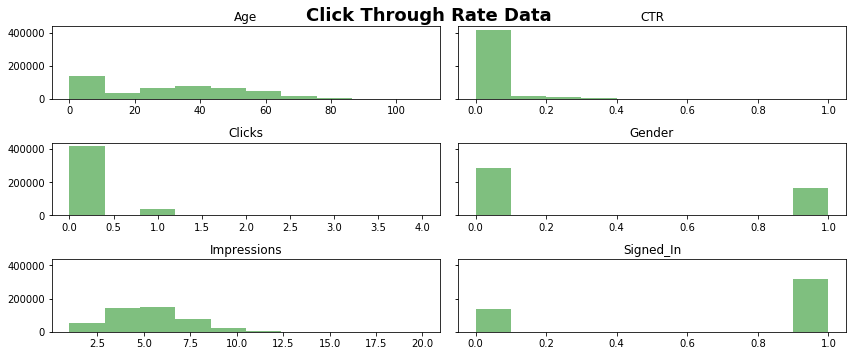

In [17]:
plot_hist(df, 'Click Through Rate Data', 'g')

### Signed In vs Not Signed In

At this point I am curious about the users that are Signed_In and not signed in. I assume there can be some behavioral differences between these groups. Let us see.

In [18]:
df_sin = df[df.Signed_In == 1].copy()
df_not_sin = df[df['Signed_In'] == 0].copy()

In [19]:
df_sin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319198 entries, 0 to 458438
Data columns (total 6 columns):
Age            319198 non-null int64
Gender         319198 non-null int64
Impressions    319198 non-null int64
Clicks         319198 non-null int64
Signed_In      319198 non-null int64
CTR            319198 non-null float64
dtypes: float64(1), int64(5)
memory usage: 17.0 MB


In [20]:
df_not_sin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136177 entries, 6 to 458440
Data columns (total 6 columns):
Age            136177 non-null int64
Gender         136177 non-null int64
Impressions    136177 non-null int64
Clicks         136177 non-null int64
Signed_In      136177 non-null int64
CTR            136177 non-null float64
dtypes: float64(1), int64(5)
memory usage: 7.3 MB


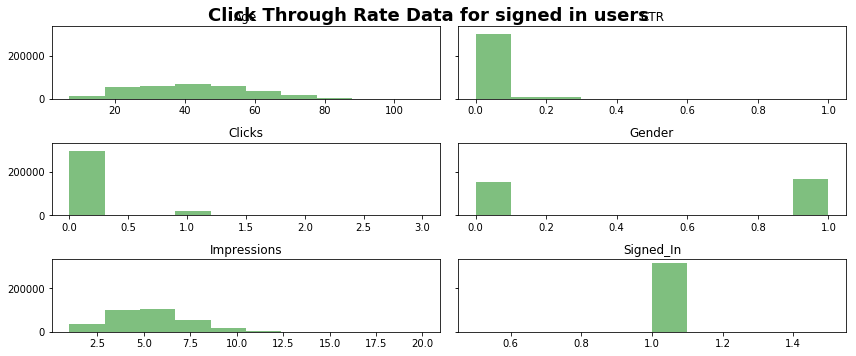

In [21]:
plot_hist(df_sin, 'Click Through Rate Data for signed in users', 'g')

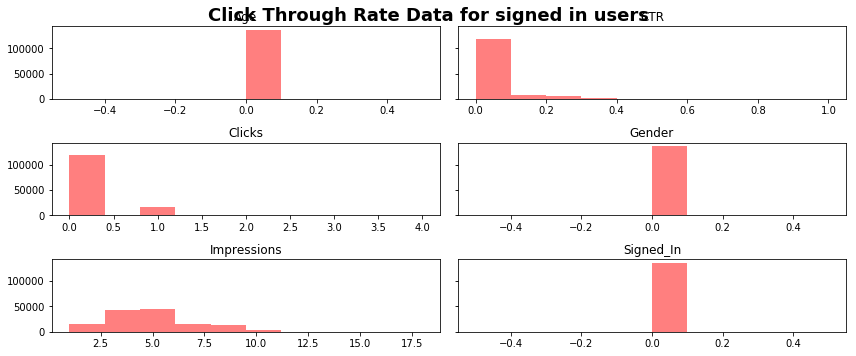

In [22]:
plot_hist(df_not_sin, 'Click Through Rate Data for signed in users', 'r')

Okay this tells us a story, yet I am into beauty and details.

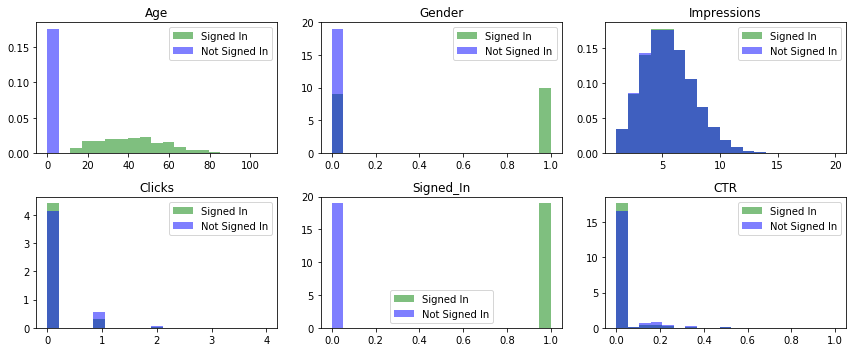

In [23]:
import numpy as np

fig, axs = plt.subplots(2, 3, figsize=(12, 5))
for col_name, ax in zip(df_sin.columns, axs.flatten()):
    bins = np.linspace(df[col_name].min(), df[col_name].max(), 20)
    ax.hist(df_sin[col_name], bins=bins, alpha=0.5,
            normed=1, label="Signed In", color='g')
    ax.hist(df_not_sin[col_name], bins=bins, alpha=0.5,
            normed=1, label="Not Signed In", color='b')
    ax.set_title(col_name)
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

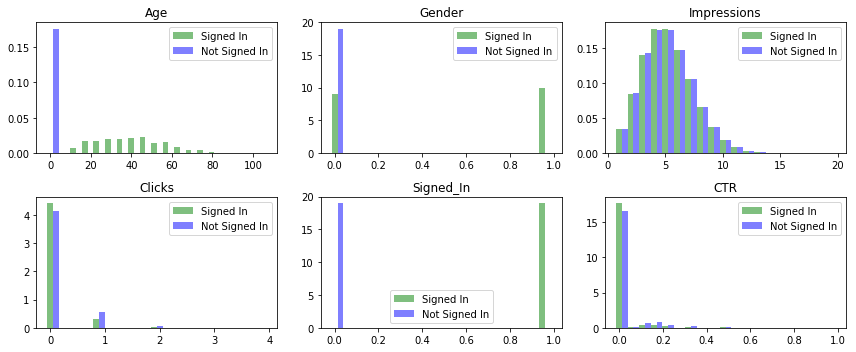

In [24]:
fig, axs = plt.subplots(2, 3, figsize=(12, 5))
for col_name, ax in zip(df_sin.columns, axs.flatten()):
    bins = np.linspace(df[col_name].min(), df[col_name].max(), 20)
    height, binz = np.histogram(df_sin[col_name], bins=bins, normed=1)
    bp1 = ax.bar(bins[:-1], height, .5*(bins[1]-bins[0]),
                 alpha=0.5, label="Signed In", color='g')
    height, binz = np.histogram(df_not_sin[col_name], bins=bins, normed=1)
    bp2 = ax.bar(bins[:-1]+.5*(bins[1]-bins[0]), height,
                 .5*(bins[1]-bins[0]), color='b', alpha=.5)
    ax.set_title(col_name)
    ax.legend((bp1[0], bp2[0]), ("Signed In", "Not Signed In"), loc='best')

plt.tight_layout()
plt.show()

Impressions present similar distributions , on the other hand there is a significant difference about click patterns. While there are fewer individuals _not_ logged in,
they actually appear to perhaps have a higher CTR
compared to those who _are_ logged in.

Enough eyeballing. Time for some data science. Will use a Welch's t-test to determine if the mean CTR between the signed-in users and the non-signed-in users is statistically different. 

The Welch's t-test, unlike Student's t-test, does not assume the two populations from which the samples are drawn have the same variance.

Testing
the null hypothesis that the mean CTRs of the populations are equal between signed in and not signed in users.

In [25]:
import scipy.stats as stats

stats.ttest_ind(df_sin.CTR, df_not_sin.CTR, equal_var=False)

Ttest_indResult(statistic=-55.37611793426087, pvalue=0.0)

Alright, we ran a Welch's t-test due to difference of distributions and found out that;

- pvalue = 0.0 
- statistic = -55.37

Lets see what these numbers mean.

For users who are logged on as opposed to not logged on and shows that this is extremely unlikely to have been observed by pure luck if the null hypothesis was true because the p-value is so small that it registers as 0.0

Signed In Mean CTR: 0.01425363523213594
Not Signed In Mean CTR: 0.028354907061657893
diff in mean: 0.014101271829521953
p value is: 0.0


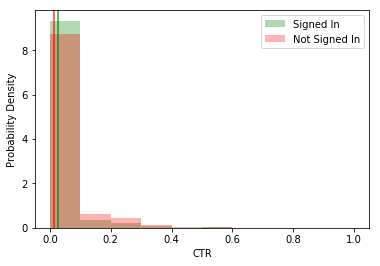

In [26]:
def plot_t_test(group_1_df, group_2_df, group_1_name, group_2_name):
    fig = plt.figure()
    group_1_mean = group_1_df['CTR'].mean()
    group_2_mean = group_2_df['CTR'].mean()

    print('%s Mean CTR: %s' % (group_1_name, group_1_mean))
    print('%s Mean CTR: %s' % (group_2_name, group_2_mean))
    print('diff in mean:', abs(group_2_mean-group_1_mean))
    p_val = stats.ttest_ind(group_1_df['CTR'], group_2_df['CTR'], equal_var=False)[1]
    print('p value is:', p_val)

    group_1_df['CTR'].hist(normed=True, label=group_1_name, color='g', alpha=0.3)
    group_2_df['CTR'].hist(normed=True, label=group_2_name, color='r', alpha=0.3)
    plt.axvline(group_1_mean, color='r', alpha=0.6, lw=2)
    plt.axvline(group_2_mean, color='g', alpha=0.6, lw=2)

    plt.ylabel('Probability Density')
    plt.xlabel('CTR')
    plt.legend()
    plt.grid('off')
    plt.show()

plot_t_test(df_sin, df_not_sin, 'Signed In', 'Not Signed In')

***FEMALE VS MALE***  (are we all same or not)

M Mean CTR: 0.01391852429759764
F Mean CTR: 0.014622012183866056
diff in mean: 0.0007034878862684155
p value is: 0.0010028527313147612


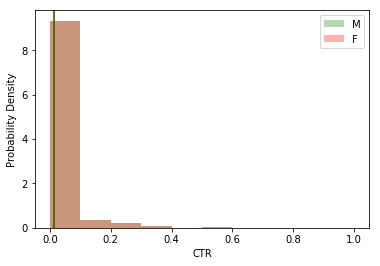

In [27]:
male = df_sin[df_sin.Gender == 1]
female = df_sin[df_sin.Gender == 0]
# Note that users *MUST* be signed in to evaluate gender otherwise data is missing.
plot_t_test(male, female, 'M', 'F')

F Mean CTR: 0.014622012183866056
M Mean CTR: 0.01391852429759764
diff in mean: 0.0007034878862684155
p value is: 0.0010028527313147612


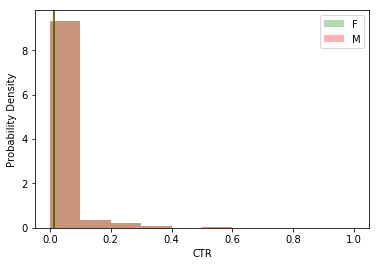

In [28]:
plot_t_test(female, male, 'F', 'M')

#### Conclusion

By eyeballing there is no significant difference on conversion rates when it comes to gender comparison. Yet pvalue tells a different story.

In [29]:
stats.ttest_ind(male.CTR, female.CTR, equal_var=False)

Ttest_indResult(statistic=-3.289756065935106, pvalue=0.0010028527313147612)

The difference in CTR between signed in and non-signed users is more
worthy of further investigation since the difference in CTR is greater.
The female/male CTR difference is only marginally significant (0.0010 < 0.00217).
The signed-in/non_signed CTR difference is more significant than that of
male/female (0.0 < 0.00217).

### Age Groups

'(18, 24]', '(24, 34]', '(34, 44]', '(44, 54]', '(54, 64]', '(64, 1000]', '(7, 18]'

Cut that data frame, given agegroups and add a new column called age_groups.

As a reminder, again we are using only the signed in data because we do not have access to age data of non signed in users.

In [30]:
df_sin['age_groups'] = pd.cut(df_sin['Age'],
                                    [7, 18, 24, 34, 44, 54, 64, 1000],
                                    include_lowest=True)

In [31]:
df_sin.head()  #there it is

,Age,Gender,Impressions,Clicks,Signed_In,CTR,age_groups
0,36,0,3,0,1,0.0,"(34.0, 44.0]"
1,73,1,3,0,1,0.0,"(64.0, 1000.0]"
2,30,0,3,0,1,0.0,"(24.0, 34.0]"
3,49,1,3,0,1,0.0,"(44.0, 54.0]"
4,47,1,11,0,1,0.0,"(44.0, 54.0]"


Always check what is happening with new columns before proceeding--> reminder for myself

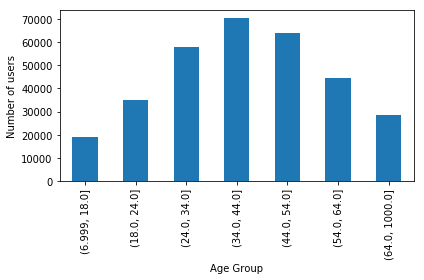

In [32]:
df_sin['age_groups'].value_counts().sort_index().plot(kind='bar',
                                                            grid=False)
plt.xlabel('Age Group')
plt.ylabel('Number of users')
plt.tight_layout()
plt.show()

Now I will determine the pairs of age groups where the difference in mean CTR is statistically significant at a Bonferroni corrected family wise error rate of 0.05. Collectngi the p-values and the difference of the means for each pair and storing these results in a DataFrame is curucial.

In [33]:
results = pd.DataFrame()
combos = combinations(pd.unique(df_sin['age_groups']), 2)
for age_group_1, age_group_2 in combos:
    age_group_1_ctr = df_sin[df_sin.age_groups == age_group_1]['CTR']
    age_group_2_ctr = df_sin[df_sin.age_groups == age_group_2]['CTR']
    p_value = stats.ttest_ind(age_group_1_ctr, age_group_2_ctr, equal_var=True)[1]
    age_group_1_ctr_mean = age_group_1_ctr.mean()
    age_group_2_ctr_mean = age_group_2_ctr.mean()
    diff = age_group_1_ctr_mean-age_group_2_ctr_mean
    absolute_diff = abs(age_group_1_ctr_mean-age_group_2_ctr_mean)
    results = results.append({
              'first_age_group':age_group_1, 'second_age_group':age_group_2, 
              'first_group_mean':age_group_1_ctr_mean, 'second_group_mean':age_group_2_ctr_mean,
              'mean_diff':diff, 'absolute_mean_diff':absolute_diff, 'p_value':p_value},
              ignore_index=True)

results = results[['first_age_group', 'second_age_group', 
                   'first_group_mean', 'second_group_mean', 
                   'mean_diff', 'absolute_mean_diff', 'p_value']]
# print(results[results['p_value'] < alpha].sort_values('absolute_mean_diff', ascending=False))
# print(results[results['p_value'] < alpha].sort_values('p_value', ascending=False))
# print(results[results['p_value'] > alpha].sort_values('absolute_mean_diff', ascending=False))
# print(results[results['p_value'] > alpha].sort_values('p_value', ascending=False))

In [39]:
alpha #reminder

0.002173913043478261

Following table presents us the differences between age groups that are significant, sorted in accordance to absolute_mean_diff.

In [34]:
results[results['p_value'] < alpha].sort_values('absolute_mean_diff', ascending=False)

,first_age_group,second_age_group,first_group_mean,second_group_mean,mean_diff,absolute_mean_diff,p_value
9,"(64.0, 1000.0]","(18.0, 24.0]",0.029803,0.009720,0.020082,0.020082,1.918094e-300
7,"(64.0, 1000.0]","(44.0, 54.0]",0.029803,0.009958,0.019845,0.019845,0.000000e+00
6,"(64.0, 1000.0]","(24.0, 34.0]",0.029803,0.010146,0.019656,0.019656,0.000000e+00
0,"(34.0, 44.0]","(64.0, 1000.0]",0.010286,0.029803,-0.019516,0.019516,0.000000e+00
18,"(6.999, 18.0]","(18.0, 24.0]",0.026621,0.009720,0.016900,0.016900,1.614766e-189
15,"(44.0, 54.0]","(6.999, 18.0]",0.009958,0.026621,-0.016663,0.016663,7.660566e-254
12,"(24.0, 34.0]","(6.999, 18.0]",0.010146,0.026621,-0.016474,0.016474,7.660450e-233
3,"(34.0, 44.0]","(6.999, 18.0]",0.010286,0.026621,-0.016334,0.016334,2.732691e-248
20,"(18.0, 24.0]","(54.0, 64.0]",0.009720,0.020307,-0.010586,0.010586,9.745420e-121
17,"(44.0, 54.0]","(54.0, 64.0]",0.009958,0.020307,-0.010349,0.010349,2.525428e-171


Following table presents us the differences between age groups that are significant, sorted in accordance to p_value.

In [35]:
results[results['p_value'] < alpha].sort_values('p_value', ascending=False)

,first_age_group,second_age_group,first_group_mean,second_group_mean,mean_diff,absolute_mean_diff,p_value
8,"(64.0, 1000.0]","(6.999, 18.0]",0.029803,0.026621,0.003182,0.003182,4.590436e-05
19,"(6.999, 18.0]","(54.0, 64.0]",0.026621,0.020307,0.006314,0.006314,3.337216e-22
10,"(64.0, 1000.0]","(54.0, 64.0]",0.029803,0.020307,0.009496,0.009496,1.433124e-59
20,"(18.0, 24.0]","(54.0, 64.0]",0.009720,0.020307,-0.010586,0.010586,9.745420e-121
14,"(24.0, 34.0]","(54.0, 64.0]",0.010146,0.020307,-0.010160,0.010160,1.091699e-153
5,"(34.0, 44.0]","(54.0, 64.0]",0.010286,0.020307,-0.010020,0.010020,1.005251e-166
17,"(44.0, 54.0]","(54.0, 64.0]",0.009958,0.020307,-0.010349,0.010349,2.525428e-171
18,"(6.999, 18.0]","(18.0, 24.0]",0.026621,0.009720,0.016900,0.016900,1.614766e-189
12,"(24.0, 34.0]","(6.999, 18.0]",0.010146,0.026621,-0.016474,0.016474,7.660450e-233
3,"(34.0, 44.0]","(6.999, 18.0]",0.010286,0.026621,-0.016334,0.016334,2.732691e-248


### Analisis:

(8,19,20,14)Not surprised! The most significant difference of conversion rates are between the highest and lowest available agegroups.

(10) Comparison between (64.0, 1000.0] and (54.0, 64.0] interrupts the pattern. Interesting, I wonder why.





Following table presents us the differences between age groups that are **not** significant, sorted in accordance to absolute_mean_diff.

In [36]:
results[results['p_value'] > alpha].sort_values('absolute_mean_diff', ascending=False)

,first_age_group,second_age_group,first_group_mean,second_group_mean,mean_diff,absolute_mean_diff,p_value
4,"(34.0, 44.0]","(18.0, 24.0]",0.010286,0.009720,0.000566,0.000566,0.089019
13,"(24.0, 34.0]","(18.0, 24.0]",0.010146,0.009720,0.000426,0.000426,0.214711
2,"(34.0, 44.0]","(44.0, 54.0]",0.010286,0.009958,0.000329,0.000329,0.234441
16,"(44.0, 54.0]","(18.0, 24.0]",0.009958,0.009720,0.000237,0.000237,0.476879
11,"(24.0, 34.0]","(44.0, 54.0]",0.010146,0.009958,0.000189,0.000189,0.514327
1,"(34.0, 44.0]","(24.0, 34.0]",0.010286,0.010146,0.000140,0.000140,0.624837


Following table presents us the differences between age groups that are **not** significant, sorted in accordance to p_value.

In [37]:
results[results['p_value'] > alpha].sort_values('p_value', ascending=False)

,first_age_group,second_age_group,first_group_mean,second_group_mean,mean_diff,absolute_mean_diff,p_value
1,"(34.0, 44.0]","(24.0, 34.0]",0.010286,0.010146,0.000140,0.000140,0.624837
11,"(24.0, 34.0]","(44.0, 54.0]",0.010146,0.009958,0.000189,0.000189,0.514327
16,"(44.0, 54.0]","(18.0, 24.0]",0.009958,0.009720,0.000237,0.000237,0.476879
2,"(34.0, 44.0]","(44.0, 54.0]",0.010286,0.009958,0.000329,0.000329,0.234441
13,"(24.0, 34.0]","(18.0, 24.0]",0.010146,0.009720,0.000426,0.000426,0.214711
4,"(34.0, 44.0]","(18.0, 24.0]",0.010286,0.009720,0.000566,0.000566,0.089019


#### Conclusion:
    
The generation gap is real! Customers in further distinct age groups actually leads to significantly differing conversion rates.